# Time series analysis

In [1]:
import os
import sys

import pandas as pd
import pandas_datareader.data as web
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from arch import arch_model

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
p = print

#p('Machine: {} {}\n'.format(os.uname().sysname, os.uname().machine))
#p(sys.version)

In [2]:
end = "2015-02-01"
start = "2007-01-01"
get_px = lambda x: web.DataReader(x, 'yahoo', start = start, end = end)['Adj Close']

symbols = ['SPY', 'TLT', 'MSFT']
data = pd.DataFrame({sym:get_px(sym) for sym in symbols})
lrets = np.log(data/data.shift(1)).dropna()

In [3]:
def tsplot(y, lags = None, figsize = (10, 8), style = 'bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        fig = plt.figure(figsize = figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan = 2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax = ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags = lags, ax = acf_ax, alpha = 0.5)
        smt.graphics.plot_pacf(y, lags = lags, ax = pacf_ax, alpha = 0.5)
        sm.qqplot(y, line = 's', ax = qq_ax)
        qq_ax.set_title('Q-Q Plot')
        scs.probplot(y, sparams = (y.mean(), y.std()), plot = pp_ax)
        
        plt.tight_layout()
    return

## Stationary
* The mean of the series should not be a function of time.
* The variance of the series should not be a function of time.
* The covariance of the $i$th term and the $(i+m)$th term should not be a function of time.

## Serial correlation
#### Essentially when we model a time series we decompose the series into three components: trend, seasonal/cyclical, and random.

Recall that the residuals (errors) of a stationary TS are serially uncorrelated by definition. If we fail to account for this in our model, that standard errors of our coefficients are underestimated, inflating the size of out T-statistics. The result would be too many Type-1 errors, where we reject our null hypothesis even when it is TRUE.

## White Noise
A time series that is a white noise process has serially UNcorrelated errors and the expected mean of those errors is equal to zero.

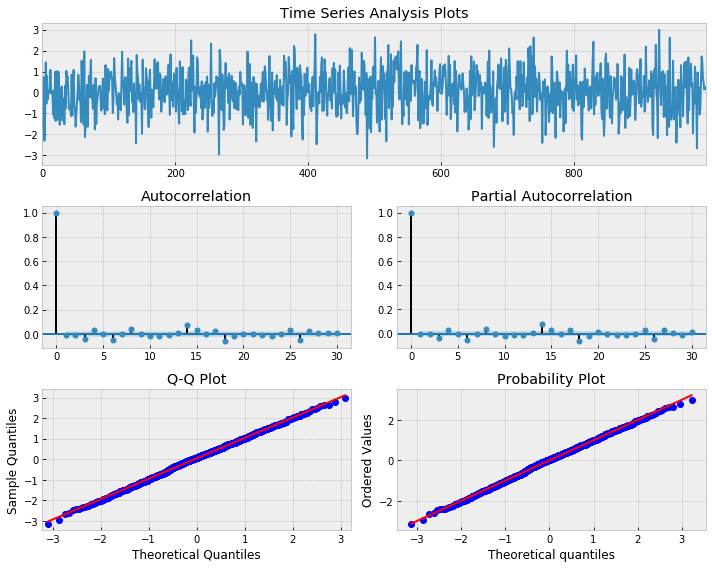

In [4]:
randser = np.random.normal(size = 1000)
tsplot(randser, lags = 30)

## Random Walk
A random walk is a time series model $x_t$ such that $x_t = x_{t-1} + w_t$, where $w_t$ is a discrete white noise series. It is non-stationary because the covariance between observations is time-dependent. If the TS we are modeling is a random walk, it is unpredictable

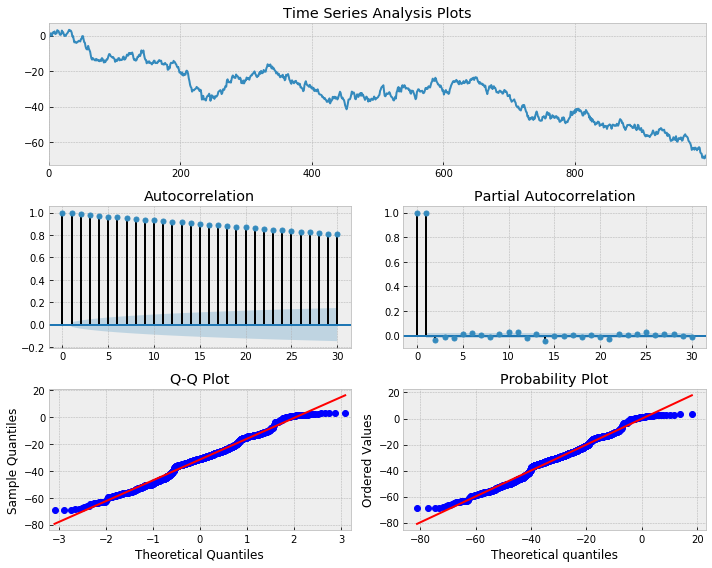

In [5]:
n_samples = 1000
x = w = np.random.normal(size = n_samples)

for t in range(n_samples):
    x[t] = x[t-1] + w[t]
    
_ = tsplot(x, lags = 30)

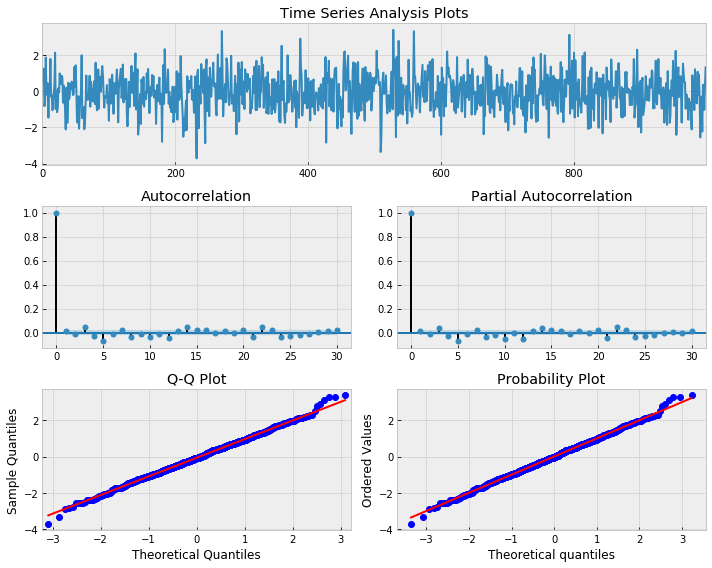

In [6]:
_ = tsplot(np.diff(x), lags = 30)

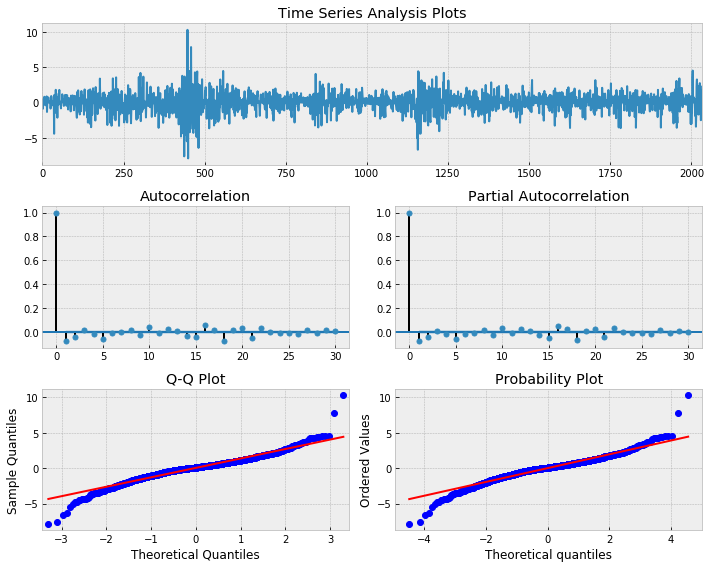

In [7]:
_ = tsplot(np.diff(data.SPY), lags = 30)

## Linear Model
Linear models are trend models representing a TS that can be graphed using a straight line. The basic equation is:
$y_t = b_0 + b_1t + \epsilon_t$

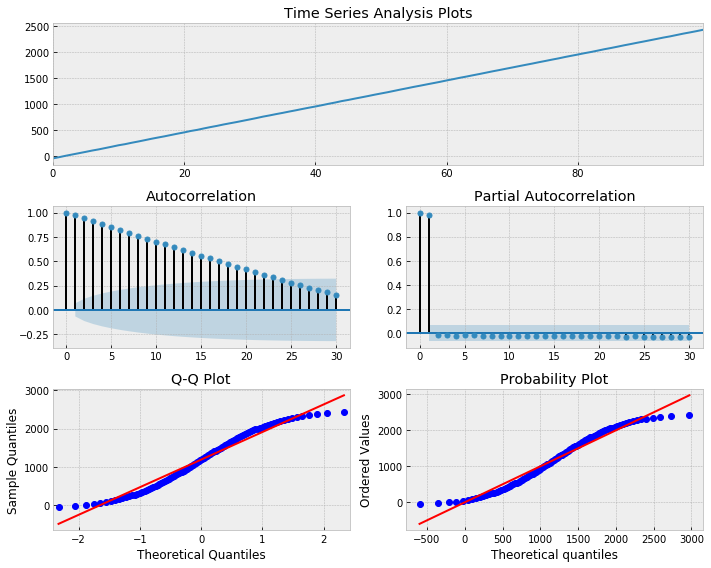

In [8]:
# Example Firm ABC are -50$ by default and +25$ at every timr step

w = np.random.randn(100)
y = np.empty_like(w)

b0 = -50.
b1 = 25.
for t in range(len(w)):
    y[t] = b0 + b1*t + w[t]
    
_ = tsplot(y, lags = 30)

## Log-Linear Model

The data points form an exponential function that represent a constant rate ofchang with respect to each time step.

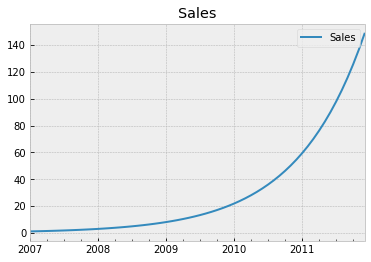

In [9]:
idx = pd.date_range('2007-01-01', '2012-01-01', freq = 'M')

sales = [np.exp(x/12) for x in range(1, len(idx)+1)]

df = pd.DataFrame(sales, columns = ['Sales'], index = idx)
with plt.style.context('bmh'):
    df.plot()
    plt.title("Sales")

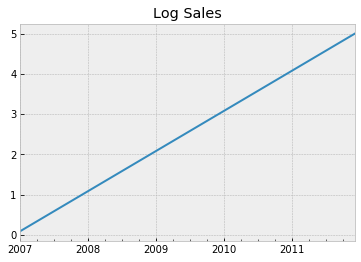

In [10]:
with plt.style.context('bmh'):
    pd.Series(np.log(sales), index = idx).plot()
    plt.title('Log Sales')